Transition to invasive breast cancer is associated with progressive changes in the structure and composition of tumor stroma

ShortName: risom2022transition

Steps of processing the data from raw to Anndata:

In [1]:
# 1, Download the raw data from https://data.mendeley.com/datasets/d87vg86zd8/3;

In [15]:
from soview import *
import pandas as pd
from PIL import Image



In [3]:
sc_path = 'risom2022transition/d87vg86zd8-3/sc/Single_Cell_Data.csv'

In [4]:
df = pd.read_csv(sc_path)

In [23]:
df[df.Point_Num==2203].label.max()

1228

In [49]:
np.unique(df['K10_cluster'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [10]:
np.unique(df['event']).shape

(69672,)

In [36]:
protein_list = df.columns[4:57]

In [37]:
protein_list

Index(['COLI', 'CD14', 'P63', 'Background', 'pS6', 'Ta', 'CD4', 'Au',
       'HLADRDPDQ', 'ECADKRTCD45', 'Nuc', 'GZMB', 'ECADKRTCD45GLUT1CD44',
       'Tryptase', 'ECAD', 'ECADKRTCD45GLUT1', 'AR', 'GLUT1', 'MPO', 'VIM',
       'CD3', 'SMA', 'CD56', 'PanKRT', 'CD11c', 'HER2', 'CD68', 'P', 'CK7',
       'CD8', 'Na', 'C', 'PD1', 'CD44', 'HIF1a', 'CD45', 'X140empty', 'FAP',
       'PDL1', 'MMP9', 'Ki67', 'CK5', 'COX2', 'CD20', 'FOXP3', 'IDO1', 'CD36',
       'ECADKRT', 'HH3', 'ER', 'Ca40', 'CD31', 'CK5norm'],
      dtype='object')

In [8]:
for i in df.columns:
    print(i)

event
Point_Num
CohortNumber
cell_size
COLI
CD14
P63
Background
pS6
Ta
CD4
Au
HLADRDPDQ
ECADKRTCD45
Nuc
GZMB
ECADKRTCD45GLUT1CD44
Tryptase
ECAD
ECADKRTCD45GLUT1
AR
GLUT1
MPO
VIM
CD3
SMA
CD56
PanKRT
CD11c
HER2
CD68
P
CK7
CD8
Na
C
PD1
CD44
HIF1a
CD45
X140empty
FAP
PDL1
MMP9
Ki67
CK5
COX2
CD20
FOXP3
IDO1
CD36
ECADKRT
HH3
ER
Ca40
CD31
CK5norm
label
area
eccentricity
major_axis_length
minor_axis_length
perimeter
Tissue_Type
Status
Tissue
sublineage
phenotype
compartment
celllineage
sublineage_code
phenotype_code
compartment_code
celllineage_code
manual_gating_cellineage
manual_gating_subineage
manual_gating_phenotype
innerduct_mask
distal_mask
stroma_mask
periph_mask
epi_mask
duct_mask
myoep_mask
ERstatus
HER2status
ARstatus
Ki67status
pS6status
GLUT1status
HIF1astatus
COX2status
CD36status
CD44status
PD1status
PDL1status
IDO1status
GZMBstatus
ECADstatus
MMP9status
VIMstatus
FAPstatus
HLADRstatus
CD3status
SMAstatus
COLIstatus
CK5status
CK7status
P63status
myoep_dist_label
myoep_dist_MinDis

In [11]:
def read_tiff(path):
    """
    path - Path to the multipage-tiff file
    """
    img = Image.open(path)
    images = []
    for i in range(img.n_frames):
        img.seek(i)
        images.append(np.array(img))
    return np.array(images)



In [12]:
tiff_path = '/aaa/jianhuayao/project2/zhiyuanyuan/PUBDT/st/mibi/risom2022transition/d87vg86zd8-3/tiff/Segmetation_Outlines_and_Labels_Mendeley'

In [13]:
sample_name = 'Point2203'

In [16]:
seg = read_tiff(f'{tiff_path}/{sample_name}_labels.tiff')

In [20]:
np.unique(seg)

array([   0,    2,    3,    4,    8,    9,   10,   11,   13,   16,   21,
         23,   24,   25,   27,   28,   29,   30,   31,   32,   33,   36,
         37,   39,   40,   41,   42,   43,   45,   47,   48,   49,   50,
         51,   52,   53,   55,   56,   57,   58,   59,   60,   61,   62,
         63,   64,   65,   66,   67,   68,   70,   71,   72,   73,   74,
         75,   76,   77,   78,   79,   80,   81,   82,   83,   84,   85,
         86,   87,   88,   89,   90,   91,   92,   94,   95,   96,   97,
         98,  100,  101,  102,  103,  104,  105,  106,  109,  111,  112,
        116,  117,  118,  119,  120,  122,  123,  124,  125,  126,  128,
        129,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140,
        141,  142,  143,  144,  145,  146,  147,  150,  151,  152,  153,
        154,  155,  156,  157,  158,  159,  161,  163,  165,  166,  167,
        168,  169,  170,  171,  172,  173,  175,  177,  178,  179,  180,
        181,  182,  185,  186,  187,  188,  189,  1

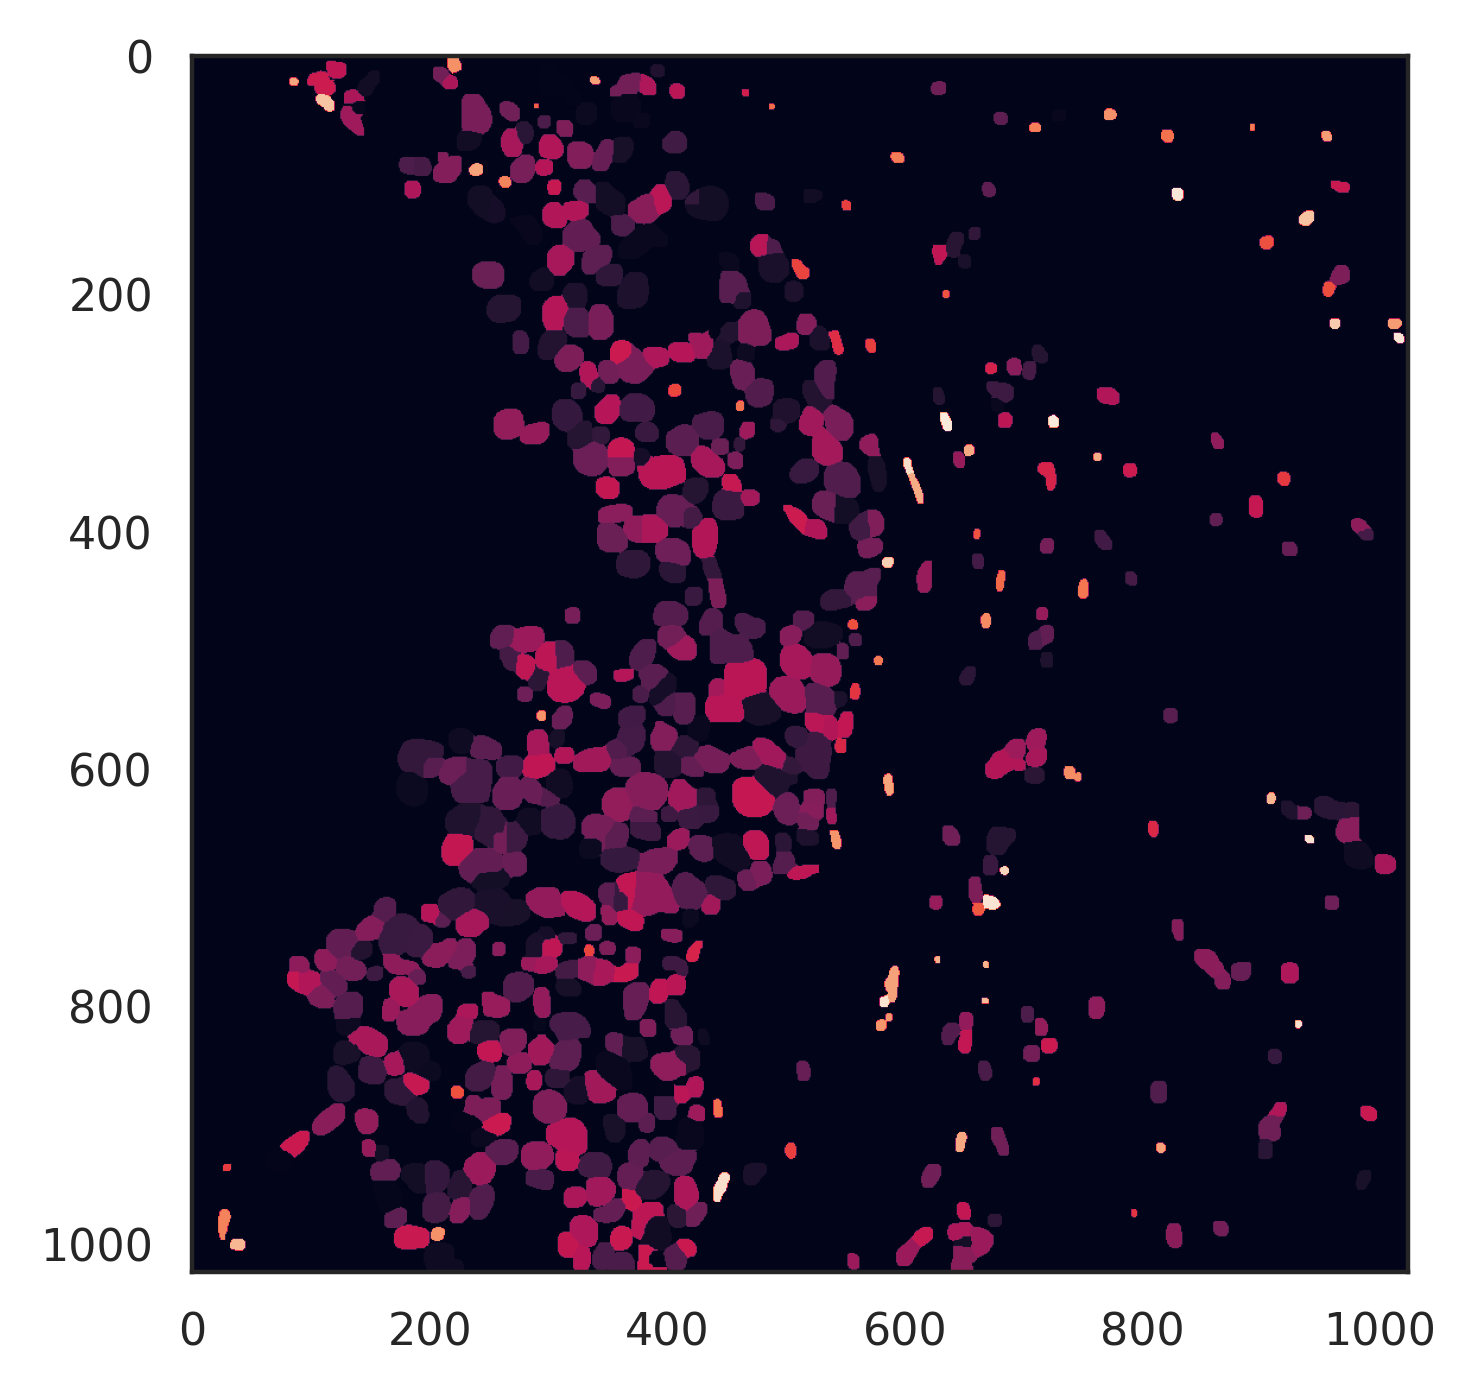

In [19]:
plt.imshow(seg[0,:])

In [29]:
df.co

,event,Point_Num,CohortNumber,cell_size,COLI,CD14,P63,Background,pS6,Ta,...,Neighbor_dist_CD8T,Neighbor_dist_CD4T,Neighbor_dist_BCELL,Neighbor_dist_TCELL,Neighbor_dist_NEUT,Neighbor_dist_IMMUNEOTHER,K10_cluster,duct_edge_mask,duct_mid_mask,duct_core_mask
0,70001,2203,3,0.761562,0.000000,0.0,0.000000,0.678031,0.638869,0.571577,...,0.052632,0.000000,0.0,0.000000,0.000,0.000000,8,0,0,0
1,70003,2203,3,0.838842,0.000000,0.0,0.000000,0.684127,0.716979,0.441150,...,0.000000,0.000000,0.0,0.000000,0.000,0.000000,2,1,0,0
2,70006,2203,3,0.729244,0.000000,0.0,0.617415,0.639245,0.000000,0.816389,...,0.000000,0.000000,0.0,0.000000,0.000,0.000000,2,0,1,0
3,70007,2203,3,0.726701,0.000000,0.0,0.000000,0.657200,0.664403,0.545218,...,0.000000,0.000000,0.0,0.000000,0.000,0.000000,2,0,1,0
4,70008,2203,3,0.640285,0.000000,0.0,0.000000,0.683288,0.923153,0.511968,...,0.000000,0.000000,0.0,0.000000,0.000,0.000000,8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69667,38134,6206,161,0.562149,0.265940,0.0,0.000000,0.685558,0.000000,0.591055,...,0.000000,0.000000,0.0,0.000000,0.000,0.000000,10,0,0,0
69668,38137,6206,161,0.398084,0.000000,0.0,0.000000,0.764095,0.000000,0.892533,...,0.041667,0.041667,0.0,0.083333,0.000,0.041667,10,0,0,0
69669,38148,6206,161,0.433114,0.000000,0.0,0.000000,0.662494,0.605838,0.941229,...,0.227270,0.000000,0.0,0.045455,0.000,0.090909,10,0,0,0
69670,38169,6206,161,0.544144,0.631799,0.0,0.000000,0.799027,0.000000,0.777088,...,0.100000,0.000000,0.0,0.000000,0.000,0.000000,10,0,0,0


In [39]:
h5ad_path = 'risom2022transition/d87vg86zd8-3/h5ad_sc'

In [55]:
sample_name

'Point2203'

In [57]:
for point in np.unique(df.Point_Num):
    point_df = df[df.Point_Num==point]
    cur_point_seg = read_tiff(f'{tiff_path}/Point{point}_labels.tiff')[0,:]
    spatial_mat = []
    for cell_id in point_df.label:
        cur_x = np.mean(np.where(cur_point_seg==cell_id)[0])
        cur_y = np.mean(np.where(cur_point_seg==cell_id)[1])
        spatial_mat.append([cur_x,cur_y])
    spatial_mat = np.array(spatial_mat)
    X = point_df[protein_list]
    adata = ad.AnnData(X)
    for i in point_df.columns:
        adata.obs[i] = point_df[i].values
    adata.obsm['spatial'] = spatial_mat
    adata.write_h5ad(f'{h5ad_path}/{point}.h5ad')

/tmp/ipykernel_15034/114829022.py:11: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)
/tmp/ipykernel_15034/114829022.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs[i] = point_df[i].values


In [38]:
point_df[protein_list]

,COLI,CD14,P63,Background,pS6,Ta,CD4,Au,HLADRDPDQ,ECADKRTCD45,...,CD20,FOXP3,IDO1,CD36,ECADKRT,HH3,ER,Ca40,CD31,CK5norm
68981,0.000000,0.0,0.0,0.782454,0.000000,0.926330,0.000000,0.906331,0.000000,0.775317,...,0.0,0.0,0.000000,0.0,0.775755,0.790788,0.0,0.821536,0.0,0.0
68982,0.000000,0.0,0.0,0.847972,0.000000,0.645717,0.000000,0.756724,0.000000,0.799681,...,0.0,0.0,0.000000,0.0,0.800133,0.757696,0.0,0.671181,0.0,0.0
68983,0.000000,0.0,0.0,0.737739,0.000000,0.688641,0.000000,0.721184,0.000000,0.771614,...,0.0,0.0,0.000000,0.0,0.772050,0.751312,0.0,0.656818,0.0,0.0
68984,0.000000,0.0,0.0,0.703609,0.000000,0.516313,0.000000,0.628605,0.000000,0.717051,...,0.0,0.0,0.249434,0.0,0.717456,0.797455,0.0,0.570487,0.0,0.0
68985,0.000000,0.0,0.0,0.778595,0.000000,0.563501,0.000000,0.705609,0.000000,0.875845,...,0.0,0.0,0.000000,0.0,0.876340,0.732518,0.0,0.610249,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69667,0.265940,0.0,0.0,0.685558,0.000000,0.591055,0.000000,0.712382,0.591773,0.193198,...,0.0,0.0,0.000000,0.0,0.000000,0.738841,0.0,0.614934,0.0,0.0
69668,0.000000,0.0,0.0,0.764095,0.000000,0.892533,0.000000,0.901236,0.386820,0.640398,...,0.0,0.0,0.000000,0.0,0.000000,0.750717,0.0,0.795975,0.0,0.0
69669,0.000000,0.0,0.0,0.662494,0.605838,0.941229,0.000000,0.947651,0.955889,0.446833,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.889367,0.0,0.0
69670,0.631799,0.0,0.0,0.799027,0.000000,0.777088,0.408532,0.846895,0.375071,0.393351,...,0.0,0.0,0.000000,0.0,0.000000,0.720362,0.0,0.683582,0.0,0.0


In [45]:
adata

AnnData object with n_obs × n_vars = 1549 × 53
    obs: 'event', 'Point_Num', 'CohortNumber', 'cell_size', 'COLI', 'CD14', 'P63', 'Background', 'pS6', 'Ta', 'CD4', 'Au', 'HLADRDPDQ', 'ECADKRTCD45', 'Nuc', 'GZMB', 'ECADKRTCD45GLUT1CD44', 'Tryptase', 'ECAD', 'ECADKRTCD45GLUT1', 'AR', 'GLUT1', 'MPO', 'VIM', 'CD3', 'SMA', 'CD56', 'PanKRT', 'CD11c', 'HER2', 'CD68', 'P', 'CK7', 'CD8', 'Na', 'C', 'PD1', 'CD44', 'HIF1a', 'CD45', 'X140empty', 'FAP', 'PDL1', 'MMP9', 'Ki67', 'CK5', 'COX2', 'CD20', 'FOXP3', 'IDO1', 'CD36', 'ECADKRT', 'HH3', 'ER', 'Ca40', 'CD31', 'CK5norm', 'label', 'area', 'eccentricity', 'major_axis_length', 'minor_axis_length', 'perimeter', 'Tissue_Type', 'Status', 'Tissue', 'sublineage', 'phenotype', 'compartment', 'celllineage', 'sublineage_code', 'phenotype_code', 'compartment_code', 'celllineage_code', 'manual_gating_cellineage', 'manual_gating_subineage', 'manual_gating_phenotype', 'innerduct_mask', 'distal_mask', 'stroma_mask', 'periph_mask', 'epi_mask', 'duct_mask', 'myoe

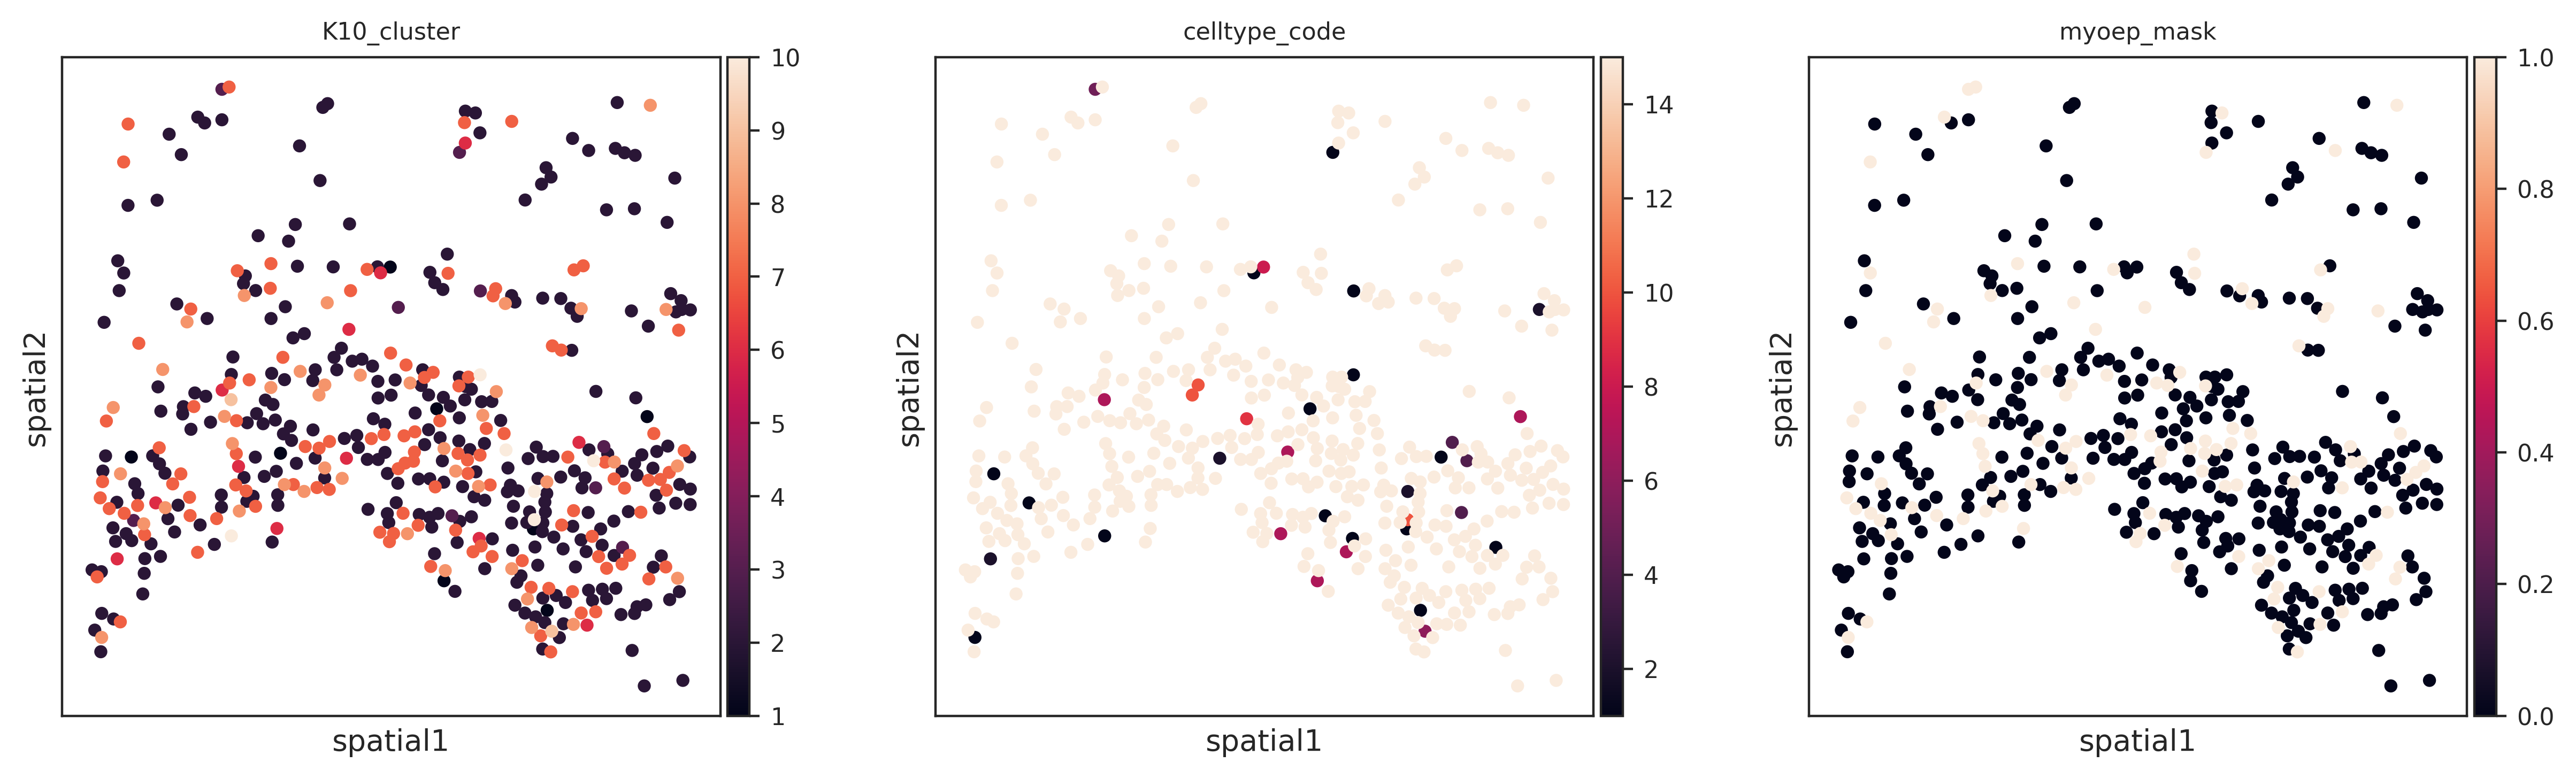

In [51]:
sc.pl.embedding(adata,basis='spatial',color=['K10_cluster','celltype_code','myoep_mask'])

In [53]:
adata

AnnData object with n_obs × n_vars = 691 × 53
    obs: 'event', 'Point_Num', 'CohortNumber', 'cell_size', 'COLI', 'CD14', 'P63', 'Background', 'pS6', 'Ta', 'CD4', 'Au', 'HLADRDPDQ', 'ECADKRTCD45', 'Nuc', 'GZMB', 'ECADKRTCD45GLUT1CD44', 'Tryptase', 'ECAD', 'ECADKRTCD45GLUT1', 'AR', 'GLUT1', 'MPO', 'VIM', 'CD3', 'SMA', 'CD56', 'PanKRT', 'CD11c', 'HER2', 'CD68', 'P', 'CK7', 'CD8', 'Na', 'C', 'PD1', 'CD44', 'HIF1a', 'CD45', 'X140empty', 'FAP', 'PDL1', 'MMP9', 'Ki67', 'CK5', 'COX2', 'CD20', 'FOXP3', 'IDO1', 'CD36', 'ECADKRT', 'HH3', 'ER', 'Ca40', 'CD31', 'CK5norm', 'label', 'area', 'eccentricity', 'major_axis_length', 'minor_axis_length', 'perimeter', 'Tissue_Type', 'Status', 'Tissue', 'sublineage', 'phenotype', 'compartment', 'celllineage', 'sublineage_code', 'phenotype_code', 'compartment_code', 'celllineage_code', 'manual_gating_cellineage', 'manual_gating_subineage', 'manual_gating_phenotype', 'innerduct_mask', 'distal_mask', 'stroma_mask', 'periph_mask', 'epi_mask', 'duct_mask', 'myoep